Best Time to Complete All Regions: 13.0 hours
Team allocation across Region: [1, 2]


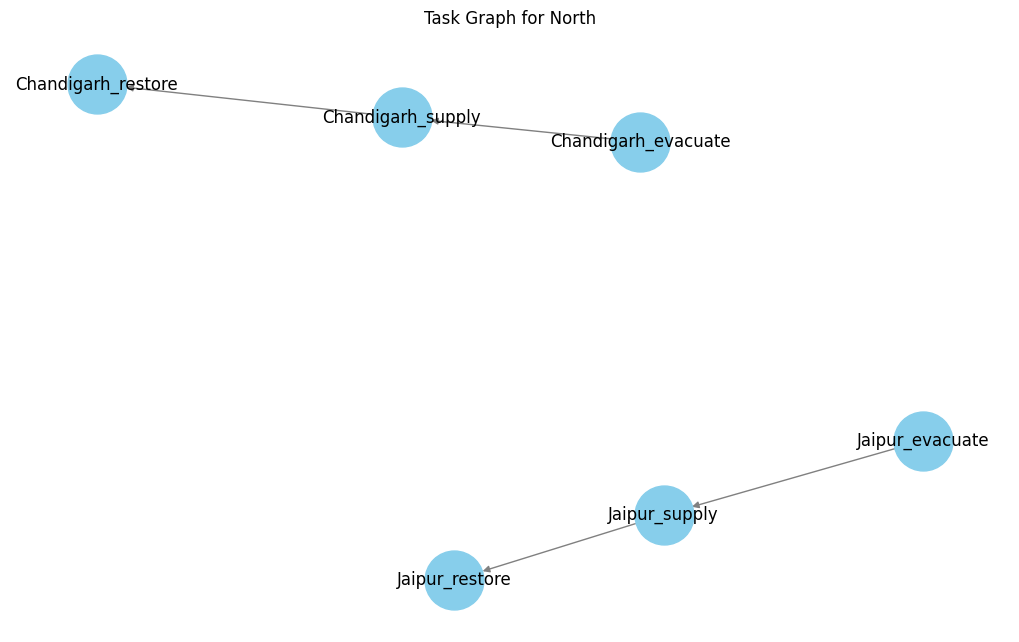

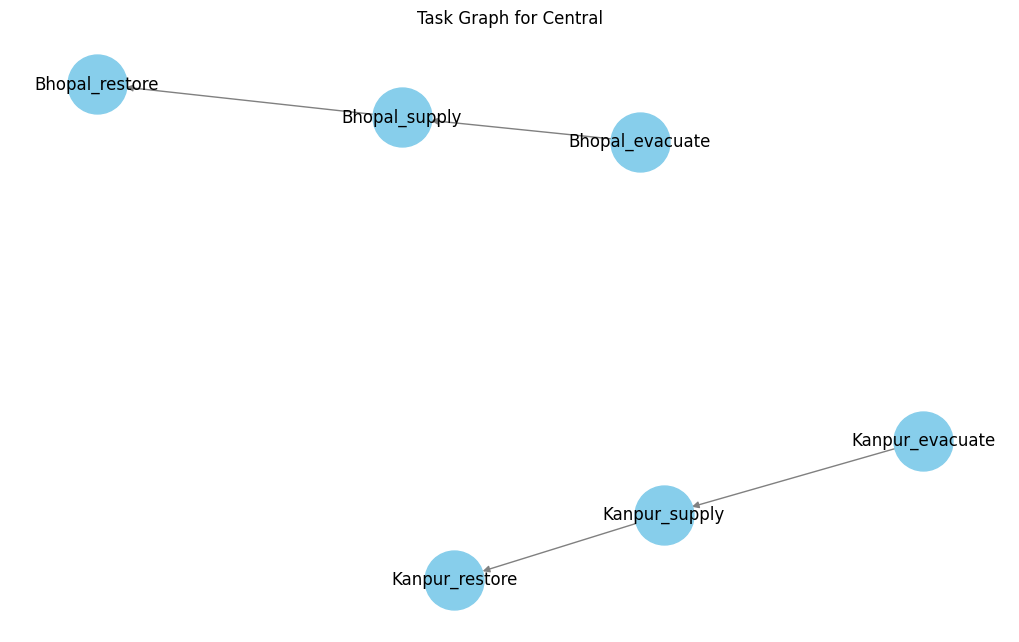

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import csv

def affected_regions():
    areas ={}
    regions=int(input("Enter the number of affected  regions:"))
    for i in range(regions):
        region=input("Enter the name of the affected regions:")
        city=input(f"Enter the affected cities from the {region}:")
        city_list=[city.strip()for city in city.split(",")]
        areas[region]=city_list
    return areas

def filter(dataset,affected_region):
    affected_cities=[city for cities in affected_region.values()for city in cities]
    filtered = dataset[dataset["City"].isin(affected_cities)].set_index("City")
    return filtered

def DAG(city_list,filtered):
    region_dag={}
    task_duration={}
    for city in city_list:
        evac=f"{city}_evacuate"
        supply=f"{city}_supply"
        restore=f"{city}_restore"

        region_dag[evac]=[supply]
        region_dag[supply]=[restore]
        region_dag[restore]=[]

        task_duration[evac]=filtered.loc[city]["Evacuation_Time(hr)"]
        task_duration[supply]=filtered.loc[city]["Supply_Time(hr)"]
        task_duration[restore]=filtered.loc[city]["Restoration_Time(hr)"]

    return region_dag,task_duration

def topological(graph):
    in_degree={node: 0 for node in graph}
    for node in graph:
        for neighbour in graph[node]:
            in_degree[neighbour] += 1

    queue=[node for node in in_degree if in_degree[node]==0]
    sorted_order=[]

    while queue:
        node=queue.pop(0)
        sorted_order.append(node)
        for neighbour in graph[node]:
            in_degree[neighbour]-=1
            if in_degree[neighbour]==0:
                queue.append(neighbour)

    if len(sorted_order)!=len(graph):
        return None
    return sorted_order

def dp(graph,duration):
    order = topological(graph)
    schedule={node:duration[node] for node in graph}
    for node in order:
        for neighbour in graph[node]:
            schedule[neighbour]=max(schedule[neighbour],schedule[node]+duration[neighbour])
    return schedule, max(schedule.values())

def allocate_resources(graphs, durations, teams):
    def Splits(n, total):
        if n == 1:
            return [[total]]
        splits = []
        for i in range(1, total - n + 2):
            for rest in Splits(n - 1, total - i):
                splits.append([i] + rest)
        return splits
    best = float("inf")
    best_split = None
    splits = Splits(len(graphs), teams)
    for split in splits:
        region_times = []
        for i in range(len(graphs)):
            team_count = split[i]
            scaled_times = {task: durations[i][task] / team_count for task in durations[i]}
            _, region_time = dp(graphs[i], scaled_times)
            region_times.append(region_time)
        max_time = max(region_times)
        if max_time < best:
            best = max_time
            best_split = split

    return best, best_split

def draw_graph(graph,region):
    g=nx.DiGraph()
    for node in graph:
        for neighbour in graph[node]:
            g.add_edge(node,neighbour)

    pos=nx.spring_layout(g,seed=42)
    plt.figure(figsize=(10,6))
    nx.draw(g,pos,with_labels=True,node_color='skyblue',node_size=1800,edge_color='gray',arrows=True)
    plt.title(f"Task Graph for {region}")
    plt.show()

def main():
    dataset = pd.read_csv("2023btech076.csv")
    regions=affected_regions()
    filtered=filter(dataset,regions)

    region_graphs=[]
    task_duration=[]
    region_name=list(regions.keys())

    for region,city in regions.items():
        dag,duration =DAG(city,filtered)
        region_graphs.append(dag)
        task_duration.append(duration)
    
    teams=int(input("Enter the total number of teams for the rescue:"))
    best_time,best_split=allocate_resources(region_graphs,task_duration,teams)

    print(f"Best Time to Complete All Regions: {round(best_time,2)} hours")
    print(f"Team allocation across Region: {best_split}")

    for i in range(len(region_graphs)):
        draw_graph(region_graphs[i],region_name[i])

if __name__ == "__main__":
    main()

Best Time to Complete All Regions: 17.0 hours
Team allocation across Region: [1, 2]


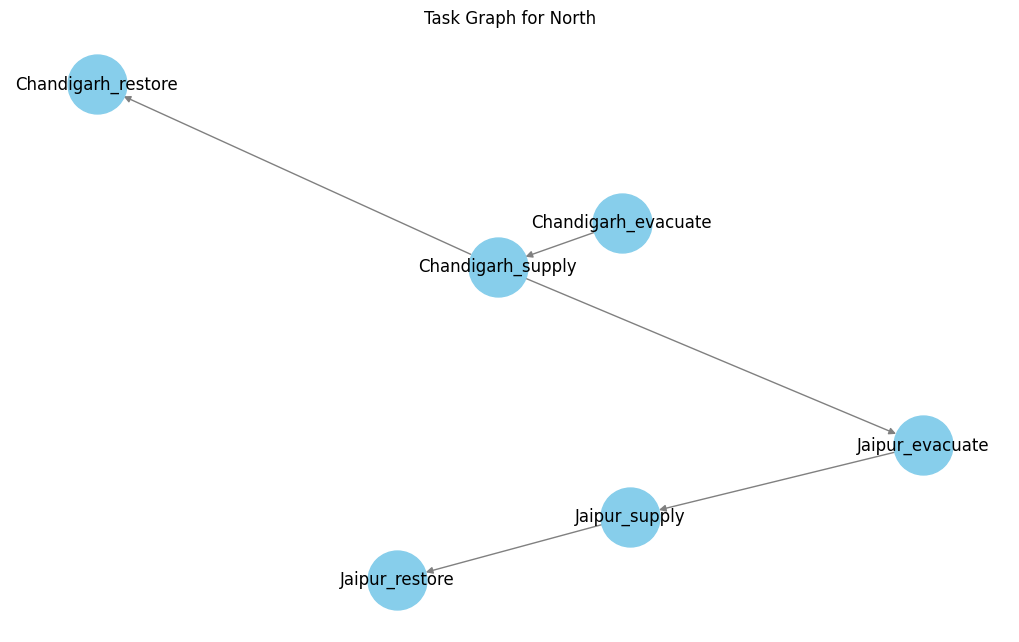

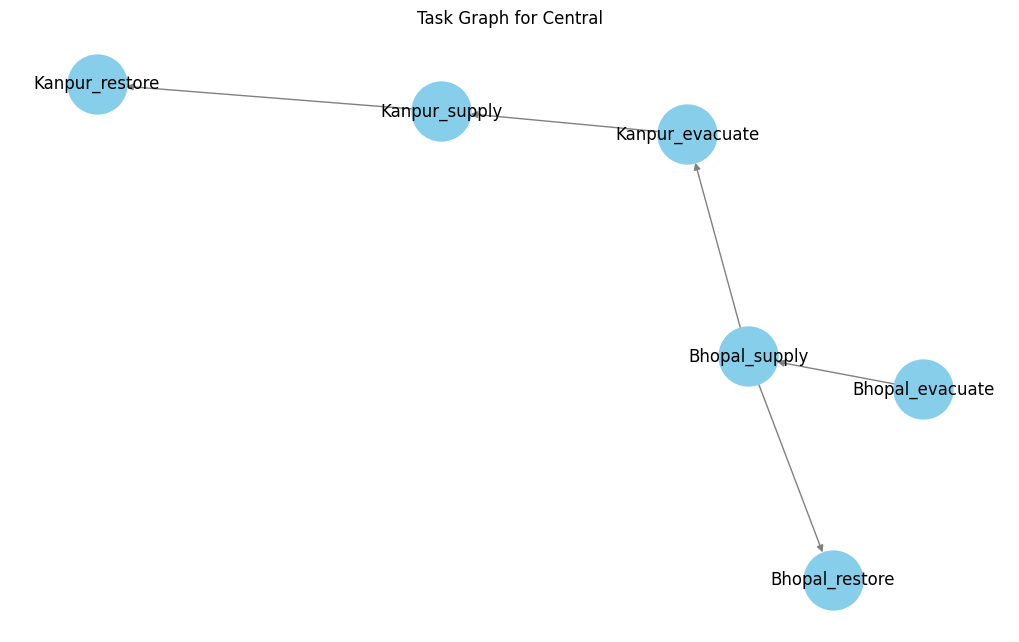

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def affected_regions():
    areas ={}
    regions=int(input("Enter the number of affected  regions:"))
    for i in range(regions):
        region=input("Enter the name of the affected regions:")
        city=input(f"Enter the affected cities from the {region}:")
        city_list=[city.strip()for city in city.split(",")]
        areas[region]=city_list
    return areas

def filter(dataset,affected_region):
    affected_cities=[city for cities in affected_region.values()for city in cities]
    filtered = dataset[dataset["City"].isin(affected_cities)].set_index("City")
    return filtered

def DAG(city_list,filtered):
    region_dag={}
    task_duration={}
    severity_map={}
    for city in city_list:
        evac=f"{city}_evacuate"
        supply=f"{city}_supply"
        restore=f"{city}_restore"

        region_dag[evac]=[supply]
        region_dag[supply]=[restore]
        region_dag[restore]=[]

        task_duration[evac]=filtered.loc[city]["Evacuation_Time(hr)"]
        task_duration[supply]=filtered.loc[city]["Supply_Time(hr)"]
        task_duration[restore]=filtered.loc[city]["Restoration_Time(hr)"]
        severity_map[city] = filtered.loc[city]["Severity_Level"]

    for city_a in city_list:
        for city_b in city_list:
            if city_a != city_b:
                if severity_map[city_a] > severity_map[city_b]:
                    region_dag[f"{city_a}_supply"].append(f"{city_b}_evacuate")

    return region_dag,task_duration

def topological(graph):
    in_degree={node: 0 for node in graph}
    for node in graph:
        for neighbour in graph[node]:
            in_degree[neighbour] += 1

    queue=[node for node in in_degree if in_degree[node]==0]
    sorted_order=[]

    while queue:
        node=queue.pop(0)
        sorted_order.append(node)
        for neighbour in graph[node]:
            in_degree[neighbour]-=1
            if in_degree[neighbour]==0:
                queue.append(neighbour)

    if len(sorted_order)!=len(graph):
        return None
    return sorted_order

def dp(graph,duration):
    order = topological(graph)
    schedule={node:duration[node] for node in graph}
    for node in order:
        for neighbour in graph[node]:
            schedule[neighbour]=max(schedule[neighbour],schedule[node]+duration[neighbour])
    return schedule, max(schedule.values())

def allocate_resources(graphs, durations, teams):
    def Splits(n, total):
        if n == 1:
            return [[total]]
        splits = []
        for i in range(1, total - n + 2):
            for rest in Splits(n - 1, total - i):
                splits.append([i] + rest)
        return splits
    best = float("inf")
    best_split = None
    splits = Splits(len(graphs), teams)
    for split in splits:
        region_times = []
        for i in range(len(graphs)):
            team_count = split[i]
            scaled_times = {task: durations[i][task] / team_count for task in durations[i]}
            _, region_time = dp(graphs[i], scaled_times)
            region_times.append(region_time)
        max_time = max(region_times)
        if max_time < best:
            best = max_time
            best_split = split

    return best, best_split

def draw_graph(graph,region):
    g=nx.DiGraph()
    for node in graph:
        for neighbour in graph[node]:
            g.add_edge(node,neighbour)

    pos=nx.spring_layout(g,seed=42)
    plt.figure(figsize=(10,6))
    nx.draw(g,pos,with_labels=True,node_color='skyblue',node_size=1800,edge_color='gray',arrows=True)
    plt.title(f"Task Graph for {region}")
    plt.show()

def main():
    dataset = pd.read_csv("2023btech076.csv")
    regions=affected_regions()
    filtered=filter(dataset,regions)

    region_graphs=[]
    task_duration=[]
    region_name=list(regions.keys())

    for region,city in regions.items():
        dag,duration =DAG(city,filtered)
        region_graphs.append(dag)
        task_duration.append(duration)
    
    teams=int(input("Enter the total number of teams for the rescue:"))
    best_time,best_split=allocate_resources(region_graphs,task_duration,teams)

    print(f"Best Time to Complete All Regions: {round(best_time,2)} hours")
    print(f"Team allocation across Region: {best_split}")

    for i in range(len(region_graphs)):
        draw_graph(region_graphs[i],region_name[i])

if __name__ == "__main__":
    main()